<center> 
    <h1> LSTM for text classification </h1>
</center>

<center> 
    <h3> Import Library</h3>
</center>

In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

<center> 
    <h3> Read data and processing </h3>
</center>

In [67]:
def remove_special_characters(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s{2,}', ' ', text)
    return text

def remove_stopwords(text):
    text = remove_special_characters(text)
    
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_text]
    return ' '.join(lemmatized_words)


In [68]:
data = []
label = []
with open('./sentiment.txt') as doc:
    for d in doc:
        line = d.strip().split('\t')
        # data.append(line[0].lower())
        data.append(remove_special_characters(line[0].lower()))
        label.append(int(line[1]))

In [69]:
data

['wow loved this place',
 'crust is not good',
 'not tasty and the texture was just nasty',
 'stopped by during the late may bank holiday off rick steve recommendation and loved it',
 'the selection on the menu was great and so were the prices',
 'now i am getting angry and i want my damn pho',
 'honeslty it didnt taste that fresh',
 'the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer',
 'the fries were great too',
 'a great touch',
 'service was very prompt',
 'would not go back',
 'the cashier had no care what so ever on what i had to say it still ended up being wayyy overpriced',
 'i tried the cape cod ravoli chickenwith cranberrymmmm',
 'i was disgusted because i was pretty sure that was human hair',
 'i was shocked because no signs indicate cash only',
 'highly recommended',
 'waitress was a little slow in service',
 'this place is not worth your time let alone vegas',
 'did not like at all',
 'the burrittos blah',
 'the 

In [70]:
len(max(data))

57

In [71]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
vocab_size = len(tokenizer.word_index)
sequences = tokenizer.texts_to_sequences(data)
X = pad_sequences(sequences, maxlen=len(max(data)))
y = np.array(label)

In [72]:
tokenizer.index_word.values()

dict_values(['the', 'and', 'i', 'was', 'a', 'to', 'is', 'this', 'it', 'of', 'food', 'not', 'for', 'in', 'place', 'good', 'service', 'we', 'very', 'my', 'with', 'great', 'had', 'that', 'be', 'so', 'were', 'are', 'but', 'have', 'back', 'you', 'they', 'here', 'on', 'at', 'like', 'go', 'all', 'time', 'our', 'will', 'as', 'really', 'just', 'there', 'an', 'their', 'if', 'best', 'would', 'ever', 'dont', 'also', 'only', 'never', 'friendly', 'one', 'up', 'no', 'your', 'restaurant', 'out', 'nice', 'again', 'from', 'been', 'what', 'amazing', 'delicious', 'did', 'by', 'vegas', 'which', 'im', 'some', 'came', 'its', 'when', 'ive', 'experience', 'pretty', 'staff', 'get', 'eat', 'us', 'minutes', 'love', 'even', 'or', 'disappointed', 'wont', 'he', 'me', 'bad', 'much', 'definitely', 'got', 'well', 'going', 'made', 'first', 'more', 'about', 'could', 'say', 'think', 'chicken', 'better', 'menu', 'too', 'salad', 'has', 'stars', 'always', 'than', 'how', 'can', 'pizza', 'fresh', 'being', 'because', 'worst', '

In [73]:
len(tokenizer.index_word.values())

2051

In [74]:
X

array([[  0,   0,   0, ..., 163,   8,  15],
       [  0,   0,   0, ...,   7,  12,  16],
       [  0,   0,   0, ...,   4,  45, 417],
       ...,
       [  0,   0,   0, ...,  12,  38,  31],
       [  0,   0,   0, ..., 136, 157,  40],
       [  0,   0,   0, ..., 343,   1, 273]], dtype=int32)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [92]:
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=0)

In [93]:
X_train = np.array(X_train)
X_test = np.array(X_test)
# X_val = np.array(X_val)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
# y_val = np.array(y_val).reshape(-1, 1)


In [94]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape
# , X_val.shape, y_val.shape

((750, 57), (750, 1), (250, 57), (250, 1))

In [125]:
model = tf.keras.Sequential([ 
    tf.keras.Input(shape=(X_train.shape[1],)), 
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=100, input_length=X_train.shape[1]), 
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(16, activation='ReLU', kernel_regularizer=tf.keras.regularizers.l2(0.01)), 
    tf.keras.layers.Dense(1, activation='sigmoid') 
]) 
  

In [126]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 57, 100)           205100    
                                                                 
 lstm_18 (LSTM)              (None, 32)                17024     
                                                                 
 dense_36 (Dense)            (None, 16)                528       
                                                                 
 dense_37 (Dense)            (None, 1)                 17        
                                                                 
Total params: 222,669
Trainable params: 222,669
Non-trainable params: 0
_________________________________________________________________


In [127]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [128]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
24/24 [==============================] - 9s 189ms/step - loss: 0.8776 - accuracy: 0.5640 - val_loss: 0.8490 - val_accuracy: 0.5120
Epoch 2/20
24/24 [==============================] - 3s 115ms/step - loss: 0.7852 - accuracy: 0.7280 - val_loss: 0.7473 - val_accuracy: 0.6600
Epoch 3/20
24/24 [==============================] - 2s 97ms/step - loss: 0.5649 - accuracy: 0.8640 - val_loss: 0.5588 - val_accuracy: 0.8520
Epoch 4/20
24/24 [==============================] - 2s 66ms/step - loss: 0.3589 - accuracy: 0.9427 - val_loss: 0.5233 - val_accuracy: 0.8080
Epoch 5/20
24/24 [==============================] - 1s 28ms/step - loss: 0.2181 - accuracy: 0.9840 - val_loss: 0.5720 - val_accuracy: 0.8120
Epoch 6/20
24/24 [==============================] - 2s 70ms/step - loss: 0.1637 - accuracy: 0.9920 - val_loss: 0.5175 - val_accuracy: 0.8440
Epoch 7/20
24/24 [==============================] - 1s 36ms/step - loss: 0.1325 - accuracy: 0.9960 - val_loss: 0.5397 - val_accuracy: 0.8360
Epoch 8/20


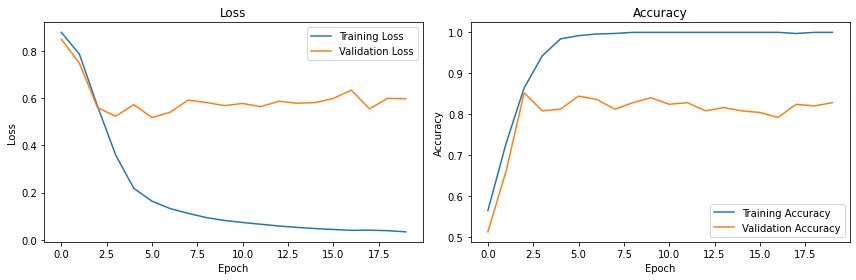

In [130]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
 
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
# # Đánh giá mô hình trên tập validation
# validation_loss, validation_accuracy = model.evaluate(X_val, y_val)

# print(f"Validation Loss: {validation_loss:.4f}")
# print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")


NameError: name 'X_val' is not defined